In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [22]:
%run load_data.py

In [3]:
# Load an image and get its label
img_id = 10
filepath='/Users/zhampel/insight/project/data/mnist/pngs/training/'
img, label = load_img(path_to_data=filepath, img_id=img_id, file_type='png')

0.0 0.99607843
3


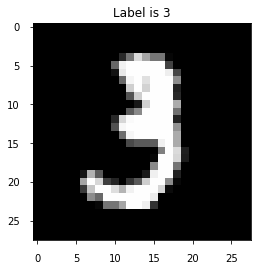

In [4]:
# Display the image
print(np.min(img), np.max(img))
print(label)
plt.title('Label is {label}'.format(label=label))
plt.imshow(img, cmap='gray')
plt.show()

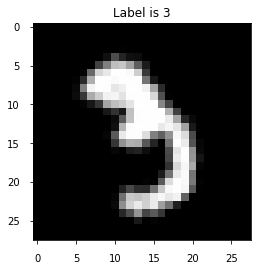

In [6]:
# Rotate the image and display
rot_img = rotate_image(img, 35.)
plt.title('Label is {label}'.format(label=label))
plt.imshow(rot_img, cmap='gray')
plt.show()

In [7]:
%run plots.py

<Figure size 432x288 with 0 Axes>

/Users/zhampel/py-venv/python3/lib/python3.6/site-packages/matplotlib/figure.py:2267: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


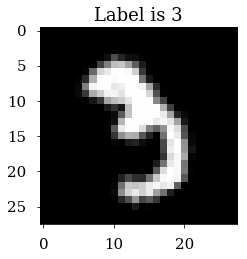

In [8]:
plot_image(rot_img, cmap='gray', label=label)

In [9]:
#x_train, y_train, x_test, y_test = load_data('mnist')

In [10]:
#print(x_train.shape)
#print(y_train.shape)
#num_classes = y_train.shape[1]
#print("Number of Classes: ", num_classes)

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD
from keras.utils import np_utils

np.random.seed(1671)
np.set_printoptions(threshold='nan')

/Users/zhampel/py-venv/python3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
RESHAPED = img.shape[1]*img.shape[0]
N_INPUTS = RESHAPED #5
N_EPOCH = 20
BATCH_SIZE = 100
VERBOSE = 0
N_CLASSES = 10
OPTIMIZER = SGD()
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2
LOSS = 'categorical_crossentropy'
METRIC = 'accuracy'

In [14]:
# Simple fully-connected model
# Define the NN model
model = Sequential()
# 1st layer
model.add(Dense(N_HIDDEN, input_shape=(N_INPUTS,)))
model.add(Activation('relu'))
# 2nd layer
model.add(Dense(N_HIDDEN))
model.add(Activation('relu'))
# final layer
model.add(Dense(N_CLASSES))
model.add(Activation('softmax'))
model.summary()

# Compile the model
model.compile(loss=LOSS, optimizer=OPTIMIZER, metrics=[METRIC])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               100480    
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
activation_2 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [23]:
trainpath='/Users/zhampel/insight/project/data/mnist/pngs/training/'
train_gen = img_generator(filepath, batch_size=BATCH_SIZE, n_classes=N_CLASSES, n_samples=100*BATCH_SIZE)

valpath='/Users/zhampel/insight/project/data/mnist/pngs/training/'
valid_gen = img_generator(valpath, batch_size=BATCH_SIZE, n_classes=N_CLASSES, n_samples=10*BATCH_SIZE)

testpath='/Users/zhampel/insight/project/data/mnist/pngs/testing/'
test_gen = img_generator(testpath, batch_size=BATCH_SIZE, n_classes=N_CLASSES, n_samples=10*BATCH_SIZE)

In [ ]:
# Run the training
history = model.fit_generator(train_gen, \
                              steps_per_epoch=BATCH_SIZE, \
                              epochs=N_EPOCH, \
                              verbose=VERBOSE, \
                              validation_data=valid_gen, \
                              validation_steps=10, \
                              #validation_data=None, \
                              class_weight=None, \
                              #validation_split=VALIDATION_SPLIT
                             )

In [ ]:
# list all data in history
print(history.history.keys())

In [ ]:
# Evaluate score
score = model.evaluate_generator(test_gen, steps=1, max_queue_size=10)
print("Test score: {}".format(score[0]))
print("Test accuracy: {}".format(score[1]))

In [ ]:
# Summarize history
f = plt.figure(figsize=(14,5))

# Summarize accuracy history
plt.subplot(1,2,1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')

plt.subplot(1,2,2)
# Summarize loss history
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper right')
#plt.show()